# Parkinsons Disease dataset Classification

## Outline

+ Introduction

+ EDA

+ Feature Engineering

+ Cassification

+ Conclusion

## Introduction

In this report we will analyse the parkinsons dataset, we will try to fit multiple classification algorithms, tune their hyperparameters, and finally, compare them to figure out which one perform better in the status feature prediction.

-----------------------------------------------------	

Data Set Characteristics: Multivariate
Number of Instances: 197
Area: Life
Attribute Characteristics: Real
Number of Attributes: 23
Date Donated: 2008-06-26
Associated Tasks: Classification
Missing Values? N/A

-----------------------------------------------------	

Source:

The dataset was created by Max Little of the University of Oxford, in 
collaboration with the National Centre for Voice and Speech, Denver, 
Colorado, who recorded the speech signals. The original study published the 
feature extraction methods for general voice disorders.

-----------------------------------------------------

Data Set Information:

This dataset is composed of a range of biomedical voice measurements from 
31 people, 23 with Parkinson's disease (PD). Each column in the table is a 
particular voice measure, and each row corresponds one of 195 voice 
recording from these individuals ("name" column). The main aim of the data 
is to discriminate healthy people from those with PD, **according to "status" 
column which is set to 0 for healthy and 1 for PD.**

The data is in ASCII CSV format. The rows of the CSV file contain an 
instance corresponding to one voice recording. There are around six 
recordings per patient, the name of the patient is identified in the first 
column.

-----------------------------------------------------

Attribute Information:

- Matrix column entries (attributes):
- name - ASCII subject name and recording number
- MDVP:Fo(Hz) - Average vocal fundamental frequency
- MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
- MDVP:Flo(Hz) - Minimum vocal fundamental frequency
- MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency
- MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
- NHR,HNR - Two measures of ratio of noise to tonal components in the voice
- status - Health status of the subject (one) - Parkinson's, (zero) - healthy
- RPDE,D2 - Two nonlinear dynamical complexity measures
- DFA - Signal fractal scaling exponent
- spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation


## Exploratory Data Analysis

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv("parkinsons.data", delimiter=',')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [11]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [12]:
data['status'].value_counts(normalize=True)

1    0.753846
0    0.246154
Name: status, dtype: float64

In [13]:
data.insert(len(data.columns)-1, 'status', data.pop('status'))

In [14]:
data.drop(columns='name', inplace=True)

In [15]:
#sns.pairplot(data, hue='status',  corner=True)

In [16]:
pd.set_option('display.max_columns', 21)
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552,0.753846
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119,0.431878
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539,0.000000
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451,1.000000
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052,1.000000
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980,1.000000
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367,1.000000


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
num_cols = [x for x in data.columns if x!='status']

In [19]:
scaler = StandardScaler()

data[num_cols] = scaler.fit_transform(data[num_cols])

In [20]:
data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,-0.829300,-0.436165,-0.952037,0.334914,0.749759,0.132963,0.760800,0.131755,0.745985,0.739536,...,0.607532,-0.067893,-0.193225,-0.807838,1.760814,0.801323,0.480477,-0.210531,0.868886,1
1,-0.770972,-0.530974,-0.057721,0.715418,1.037674,0.453892,1.276809,0.452684,1.681731,1.768464,...,1.548254,-0.137843,-0.634508,-0.387524,1.837562,1.479853,1.311185,0.275077,1.803605,1
2,-0.909476,-0.723168,-0.109875,0.884991,1.325589,0.720770,1.585687,0.721813,1.202693,1.027636,...,1.175323,-0.291633,-0.279760,-0.662075,1.942048,1.141445,1.017682,-0.103629,1.402661,1
3,-0.909622,-0.649092,-0.114229,0.775389,1.325589,0.578885,1.284076,0.577677,1.340396,1.207698,...,1.340229,-0.280719,-0.281346,-0.613134,1.832380,1.440945,1.293840,0.062145,1.806954,1
4,-0.925657,-0.606245,-0.130608,1.368893,1.901418,1.095750,2.047187,1.096793,1.836448,1.552389,...,1.899461,-0.178026,-0.506745,-0.783021,1.909364,1.780940,0.096195,-0.130026,2.267082,1


In [21]:
Corr = data.corr()

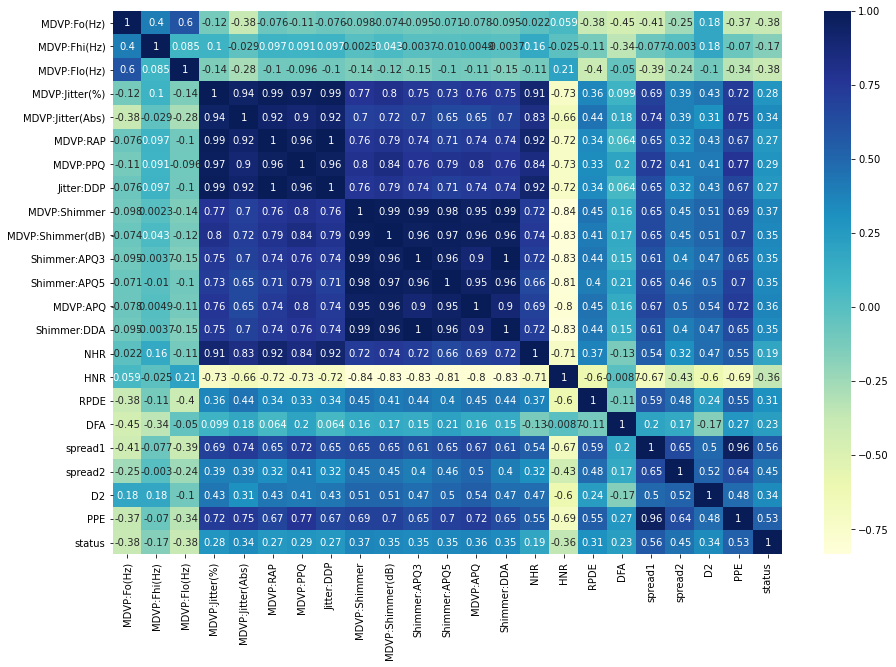

In [22]:
# plotting correlation heatmap
plt.figure(figsize = (15,10))
sns.heatmap(Corr, cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

We see that the 'Jitter:DDP' feature is perfectly correlated with 'MDVP:RAP'. The same applies to 'Shimmer:DDA' and 'Shimmer:APQ3'. That's why we're going to drop duplicates.

## Feature Engineering

In this section, we will drop perfectly correlated columns, and reduce the number of highly correlated ones using Principal Component Analysis (PCA).

In [23]:
data.drop(columns = ['Shimmer:APQ3', 'MDVP:RAP'],axis=1,  inplace=True)

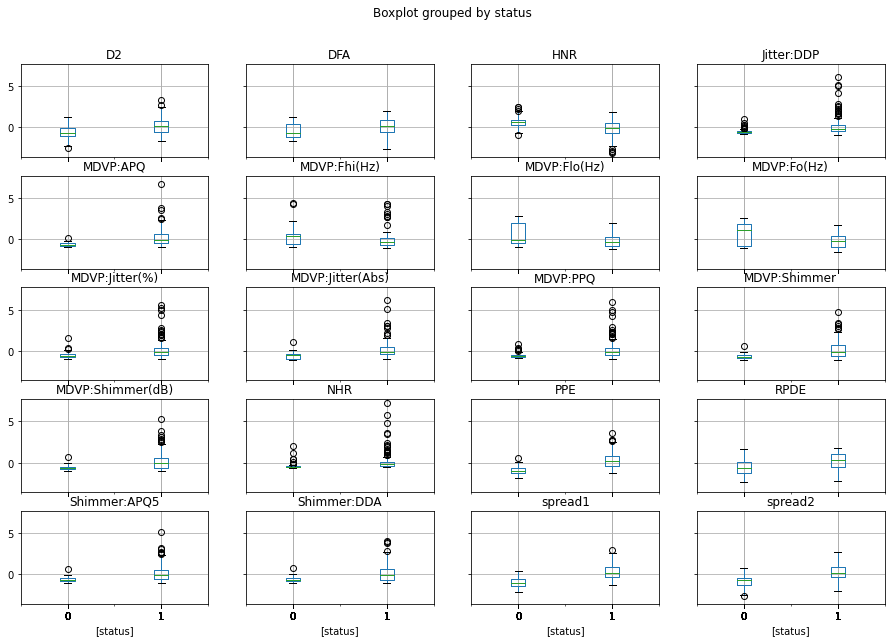

In [24]:
data.boxplot(by='status', figsize=(15,10))
plt.show()

In [25]:
Corr = data.corr()

In [26]:
for x in range(Corr.shape[0]):
    Corr.iloc[x,x] = 0.0
    
Corr

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
MDVP:Fo(Hz),0.000000,0.400985,0.596546,-0.118003,-0.382027,-0.112165,-0.076213,-0.098374,-0.073742,-0.070682,-0.077774,-0.094732,-0.021981,0.059144,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356,-0.383535
MDVP:Fhi(Hz),0.400985,0.000000,0.084951,0.102086,-0.029198,0.091126,0.097150,0.002281,0.043465,-0.009997,0.004937,-0.003733,0.163766,-0.024893,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543,-0.166136
MDVP:Flo(Hz),0.596546,0.084951,0.000000,-0.139919,-0.277815,-0.095828,-0.100488,-0.144543,-0.119089,-0.101095,-0.107293,-0.150737,-0.108670,0.210851,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071,-0.380200
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,0.000000,0.935714,0.974256,0.990276,0.769063,0.804289,0.725561,0.758255,0.746635,0.906959,-0.728165,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543,0.278220
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,0.000000,0.897778,0.922913,0.703322,0.716601,0.648961,0.648793,0.697170,0.834972,-0.656810,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162,0.338653
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.000000,0.957319,0.797826,0.839239,0.786780,0.804139,0.763592,0.844604,-0.731510,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647,0.288698
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,0.957319,0.000000,0.759555,0.790621,0.709907,0.737439,0.744901,0.919548,-0.721494,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005,0.266646
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.797826,0.759555,0.000000,0.987258,0.982835,0.950083,0.987626,0.722194,-0.835271,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771,0.367430
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.839239,0.790621,0.987258,0.000000,0.973751,0.960977,0.963202,0.744477,-0.827805,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058,0.350697
Shimmer:APQ5,-0.070682,-0.009997,-0.101095,0.725561,0.648961,0.786780,0.709907,0.982835,0.973751,0.000000,0.949146,0.960072,0.658080,-0.813753,0.399903,0.213873,0.646809,0.457195,0.502174,0.702456,0.351148


In [27]:
Corr.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer',
       'MDVP:Shimmer(dB)', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR',
       'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE', 'status'],
      dtype='object')

In [28]:
Corr.unstack().sort_values(ascending=False).drop_duplicates()

Jitter:DDP      MDVP:Jitter(%)      0.990276
Shimmer:DDA     MDVP:Shimmer        0.987626
MDVP:Shimmer    MDVP:Shimmer(dB)    0.987258
Shimmer:APQ5    MDVP:Shimmer        0.982835
MDVP:Jitter(%)  MDVP:PPQ            0.974256
                                      ...   
HNR             MDVP:APQ           -0.800407
                Shimmer:APQ5       -0.813753
                Shimmer:DDA        -0.827130
                MDVP:Shimmer(dB)   -0.827805
                MDVP:Shimmer       -0.835271
Length: 211, dtype: float64

In [29]:
filtered_list = []
for col in Corr.columns:
    features = sorted(list(Corr[(Corr > 0.9)][col][Corr[(Corr > 0.9)][col]>0.9].index))
    filtered_list.append(features)

In [30]:
unique=[]
for x in filtered_list:
    if x not in unique and x!=[]:
        unique.append(x) 

In [31]:
unique

[['Jitter:DDP', 'MDVP:Jitter(Abs)', 'MDVP:PPQ', 'NHR'],
 ['Jitter:DDP', 'MDVP:Jitter(%)'],
 ['MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:PPQ', 'NHR'],
 ['MDVP:APQ', 'MDVP:Shimmer(dB)', 'Shimmer:APQ5', 'Shimmer:DDA'],
 ['MDVP:APQ', 'MDVP:Shimmer', 'Shimmer:APQ5', 'Shimmer:DDA'],
 ['MDVP:APQ', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:DDA'],
 ['MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ5'],
 ['PPE'],
 ['spread1']]

Interestingly, when we look at these features description, we find that the main correlations are between the features that measure the frequency and amplitude.

- MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency
- MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude

From this point, we will create two lists from these features, and perform dimentionality reduction to create a total of two new features that are representative of their variations.

In [32]:
features_l1=['Jitter:DDP', 'MDVP:Jitter(Abs)', 'MDVP:PPQ', 'NHR','MDVP:Jitter(%)']
features_l2=['MDVP:APQ', 'MDVP:Shimmer', 'Shimmer:APQ5', 'Shimmer:DDA','MDVP:Shimmer(dB)']

In [33]:
feat_list = {'freq_measures':features_l1, 'amp_measures':features_l2}

In [36]:
from sklearn.decomposition import PCA

PCAmod = PCA(n_components=1)

In [37]:
for f_list in feat_list:
    
    PCAmod.fit(data[feat_list[f_list]])
    tr_data = PCAmod.transform(data[feat_list[f_list]])
    tr_list = pd.DataFrame(tr_data, columns=['{}'.format(f_list)])
    data = pd.concat([tr_list, data], axis=1)


In [31]:
data1 = data.copy()

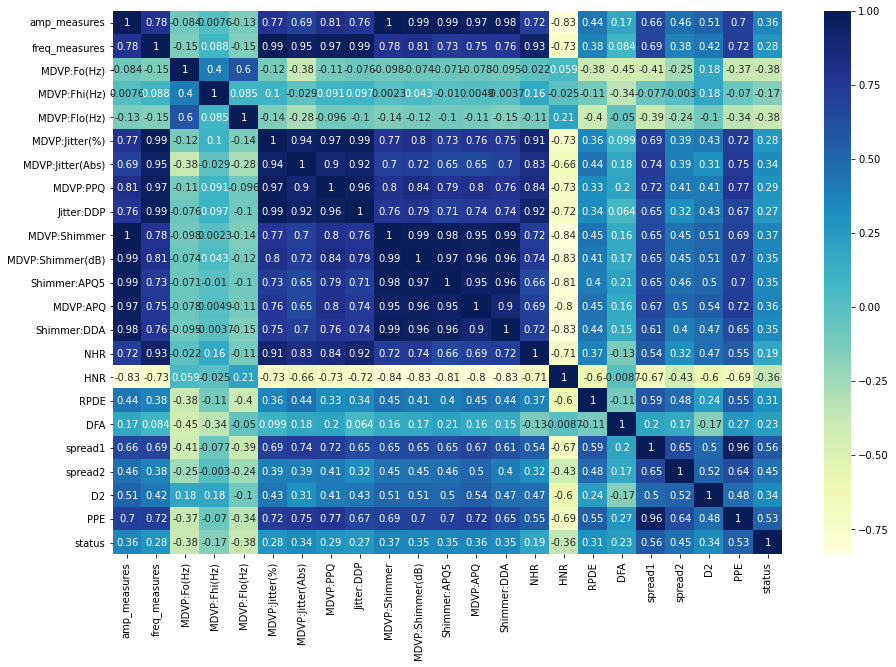

In [38]:
# plotting correlation heatmap
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

We see that the features that we gathered in list1 and list2 are highly correlated with the newly created features, which means that the PCA was successful, and thus we will drop those lists since reducing dimensions is our primary goal.

In [33]:
for f_list in feat_list:
    data.drop(columns=feat_list[f_list], inplace=True)

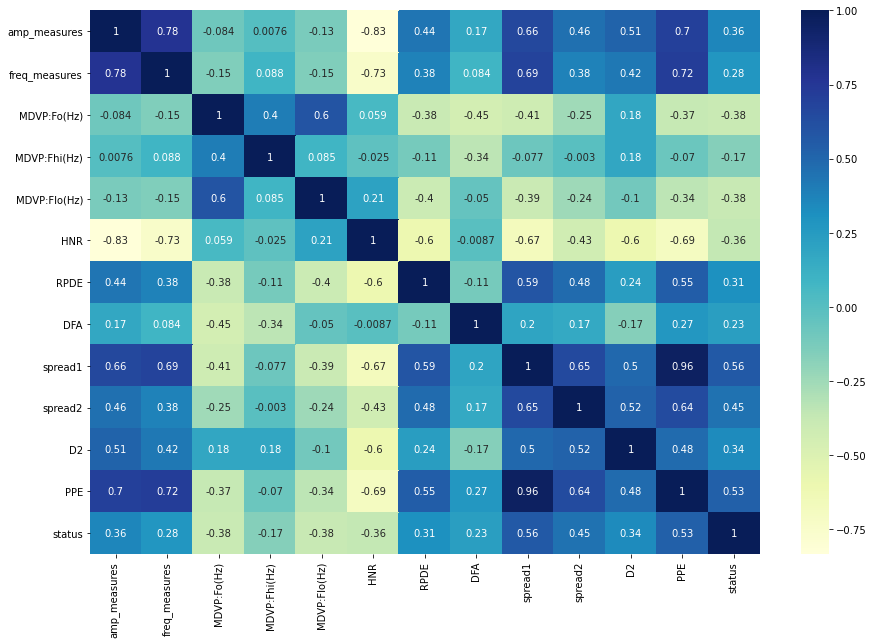

In [34]:
# plotting correlation heatmap
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [35]:
data.shape

(195, 13)

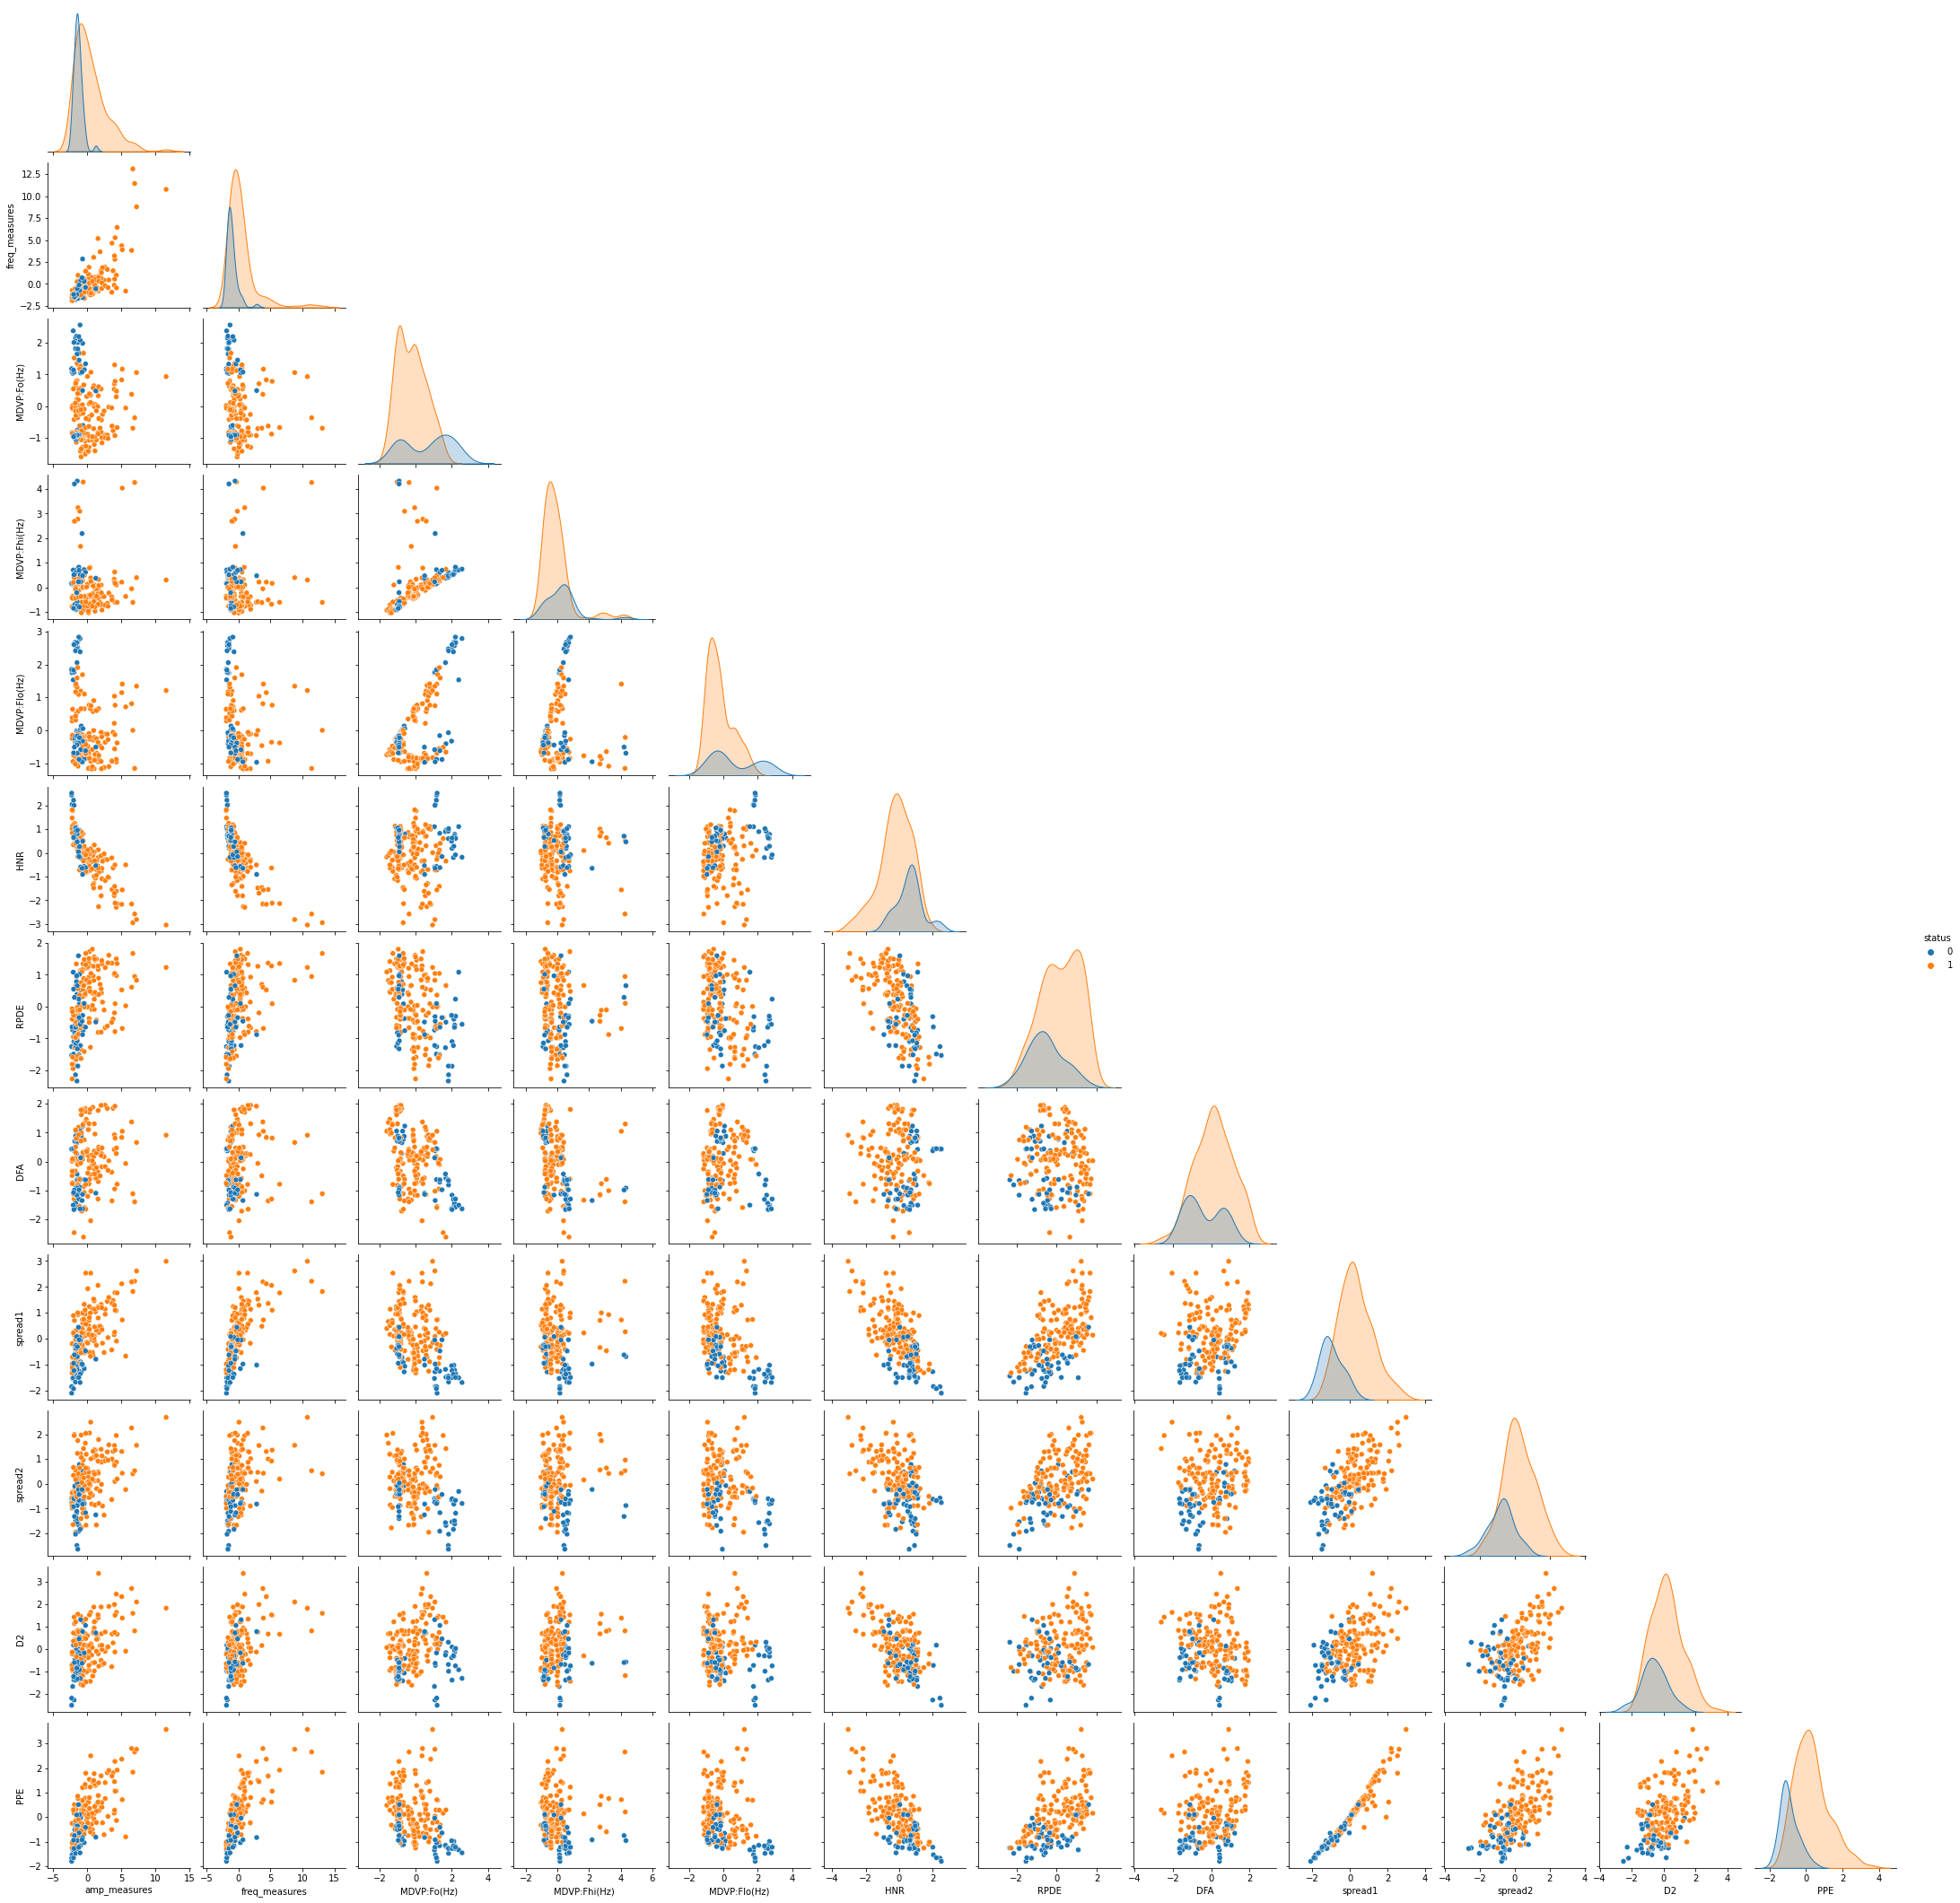

In [36]:
sns.pairplot(data, hue='status', corner=True)

## Machine Learning ( 'status' Classification )

Here we will fit several algorithms to our data, mainly Logistic Regression, K Neighbors Classifier, SVC and XGBClassifier.
And we will compare their performances based of the F1_score, since the status feature is constructed with inbalanced classes as we saw in EDA section : 

0.753846 : Parkinsons Disease (1)

0.246154 : Healthy(0)

In [37]:
#import classifier algorithm here
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

In [38]:
X = data[[x for x in data.columns if x!='status']]
y = data['status']
model_comparison = list()

In [39]:
kf = StratifiedKFold(shuffle=True, random_state=22, n_splits=4 )

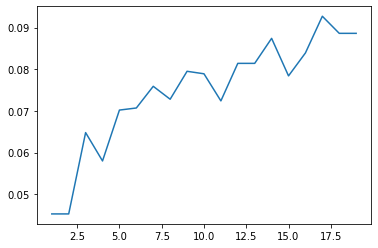

In [40]:
error_rates = list() # 1-accuracy

ks = range(1,20)
scores=[]

for k in ks:

    predictions = cross_val_predict(KNeighborsClassifier(n_neighbors=k, weights='distance'), X, y, cv = kf)
    error = 1-round(f1_score(y, predictions), 4)
    scores.append(error)

plt.plot(ks, scores)

In [41]:
knn = KNeighborsClassifier(n_neighbors=4, weights='distance')
knn = knn.fit(X, y)

y_pred = knn.predict(X)
score = f1_score(predictions, y)
model_comparison.append(('KNN', score))
score

0.9113924050632911

In [42]:
confusion_matrix(y, predictions)

array([[ 23,  25],
       [  3, 144]], dtype=int64)

In [43]:
from sklearn.metrics import classification_report

print(classification_report(y, predictions))

              precision    recall  f1-score   support

           0       0.88      0.48      0.62        48
           1       0.85      0.98      0.91       147

    accuracy                           0.86       195
   macro avg       0.87      0.73      0.77       195
weighted avg       0.86      0.86      0.84       195



In [44]:
params = { 'penalty' : ['none','l1','l2','elasticnet'],
           'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
           'C' : [0.02, 0.015, 0.01, 0.005] }

grid = GridSearchCV(LogisticRegression(), params, cv=kf, scoring='f1')

In [45]:
grid.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=22, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.02, 0.015, 0.01, 0.005],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='f1')

In [46]:
grid.best_score_, grid.best_params_

(0.9097944991404907, {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'})

In [47]:
model_comparison.append(('Logistic_Regression', grid.best_score_))

In [48]:
params = {'kernel' : ['poly', 'rbf', 'sigmoid'],
          'C' : [3,3.5,4,4.5,5] }

grid = GridSearchCV(SVC(), params, cv=kf, scoring='f1')

In [49]:
grid.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=22, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [3, 3.5, 4, 4.5, 5],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             scoring='f1')

In [50]:
grid.best_score_, grid.best_params_

(0.9379457273794383, {'C': 4, 'kernel': 'rbf'})

In [51]:
model_comparison.append(('SVC', grid.best_score_))

In [52]:
params = {'learning_rate':[0.18,0.17,0.16],
          'max_depth':[1,2,3] }

grid = GridSearchCV(XGBClassifier( n_estimators=140, seed=27, verbosity=0),
                    params, cv=kf, scoring='f1')

In [53]:
grid.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=22, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
             

In [54]:
grid.best_score_, grid.best_params_

(0.9463612717037375, {'learning_rate': 0.17, 'max_depth': 2})

In [55]:
model_comparison.append(('XGBoost_Classifier', grid.best_score_))

In [56]:
Comparison = pd.DataFrame(model_comparison, columns=('Model','F1_Score'))
Comparison.sort_values(by='F1_Score', ascending=False).reset_index(drop=True)

,Model,F1_Score
0,XGBoost_Classifier,0.946361
1,SVC,0.937946
2,KNN,0.911392
3,Logistic_Regression,0.909794


# Without Dimensionality Reduction (DR)

Now we will try the same algorithms but this time using the whole dataset, without performing dimensionality reduction.

In [57]:
X1 = data1[[x for x in data1.columns if x!='status']]
y1 = data1['status']
model_comparison1 = list()

In [58]:
kf = StratifiedKFold(shuffle=True, random_state=22, n_splits=4 )

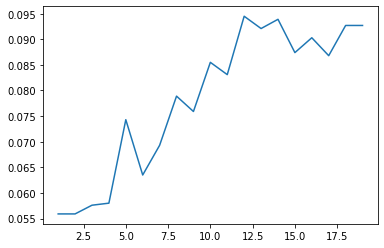

In [59]:
error_rates1 = list() # 1-accuracy

ks = range(1,20)
scores1=[]

for k in ks:

    predictions1 = cross_val_predict(KNeighborsClassifier(n_neighbors=k, weights='distance'), X1, y1, cv = kf)
    error1 = 1-round(f1_score(y1, predictions1), 4)
    scores1.append(error1)

plt.plot(ks, scores1)

In [60]:
knn = KNeighborsClassifier(n_neighbors=4, weights='distance')
knn = knn.fit(X1, y1)

y_pred = knn.predict(X1)
score1 = f1_score(predictions, y1)
model_comparison1.append(('KNN', score1))
score1

0.9113924050632911

In [61]:
confusion_matrix(y1, predictions)

array([[ 23,  25],
       [  3, 144]], dtype=int64)

In [62]:
from sklearn.metrics import classification_report

print(classification_report(y1, predictions))

              precision    recall  f1-score   support

           0       0.88      0.48      0.62        48
           1       0.85      0.98      0.91       147

    accuracy                           0.86       195
   macro avg       0.87      0.73      0.77       195
weighted avg       0.86      0.86      0.84       195



In [63]:
params = { 'penalty' : ['none','l1','l2','elasticnet'],
           'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
           'C' : [0.02, 0.015, 0.01, 0.005] }

grid = GridSearchCV(LogisticRegression(), params, cv=kf, scoring='f1')

In [64]:
grid.fit(X1, y1)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=22, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.02, 0.015, 0.01, 0.005],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='f1')

In [65]:
grid.best_score_, grid.best_params_

(0.9085443037974683, {'C': 0.015, 'penalty': 'l2', 'solver': 'newton-cg'})

In [66]:
model_comparison1.append(('Logistic_Regression', grid.best_score_))

In [67]:
params = {'kernel' : ['poly', 'rbf', 'sigmoid'],
          'C' : [1,1.5,2,2.5,3] }

grid = GridSearchCV(SVC(), params, cv=kf, scoring='f1')

In [68]:
grid.fit(X1, y1)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=22, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [1, 1.5, 2, 2.5, 3],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             scoring='f1')

In [69]:
grid.best_score_, grid.best_params_

(0.9358868979122144, {'C': 2, 'kernel': 'rbf'})

In [70]:
model_comparison1.append(('SVC', grid.best_score_))

In [71]:
params = {'learning_rate':[0.18,0.17,0.16],
          'max_depth':[2,3,4] }

grid = GridSearchCV(XGBClassifier( n_estimators=140, seed=27, verbosity=0),
                    params, cv=kf, scoring='f1')

In [72]:
grid.fit(X1, y1)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=22, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
             

In [73]:
grid.best_score_, grid.best_params_

(0.9504798191637103, {'learning_rate': 0.17, 'max_depth': 3})

In [74]:
model_comparison1.append(('XGBoost_Classifier', grid.best_score_))

In [75]:
Comparison1 = pd.DataFrame(model_comparison1, columns=('Model','F1_Score'))
Comparison1.sort_values(by='F1_Score', ascending=False).reset_index(drop=True)

,Model,F1_Score
0,XGBoost_Classifier,0.950480
1,SVC,0.935887
2,KNN,0.911392
3,Logistic_Regression,0.908544


We see that the models ranking didn't differ after performing dimensionality reduction, let's compare them with the models using dimensionality reduction.

In [78]:
Comparison.set_index('Model').join(Comparison1.
                                   set_index('Model'),
                                   lsuffix='_With-DR',
                                   rsuffix='_Without-DR').sort_values(by='F1_Score_With-DR',ascending=False)

,F1_Score_With-DR,F1_Score_Without-DR
Model,,
XGBoost_Classifier,0.946361,0.950480
SVC,0.937946,0.935887
KNN,0.911392,0.911392
Logistic_Regression,0.909794,0.908544


We see that the Dimensionality Reduction powered-up the SVC and Logistic_Regression performance, while it didn't affect KNN model at all, it impacted negatively the greedy algorithm XGBoost_Classifier.

## Conclusion

We can see that these models perform great in predicting the target feature, achieving F1_score greater than 90% with the XGBoost algorithm in the first position.

We can go further in improving the model performance by tuning other hyperparameters, or even building a Voting Classifier.

Other improvements would involve creating combinations between variables.

### Acknowledgments:

This dataset was downloaded from the UCI Machine Learning Repository [website](https://archive.ics.uci.edu/ml/datasets/parkinsons "UCI Machine Learning Repository")

'Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection', 
Little MA, McSharry PE, Roberts SJ, Costello DAE, Moroz IM. 
BioMedical Engineering OnLine 2007, 6:23 (26 June 2007)